In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport
import ETL as etl
import warnings
warnings.filterwarnings('ignore')

### Tabla de Contenido: 
Análisis:

* [Historico Velocidad Internet](##Velocidad-Internet)
* [Internet Acceso Nacional BAF](#segunda)
* [Internet Acceso Por Tecnologia Trimestral](#tercera)
* [Internet Acceso Por Velocidad Por Provincia](#cuarta)
* [Internet Ingresos Trimestral](#quinta)
* [Penetracion Hogares Internet Fijo](#sexta)
* [Internet Acceso Por Velocidad Por Rango](#septima)
* [Internet Acceso Por Tecnología Por Provincia](#octava)
* [Mapa Conectividad](#novena)



<!-- no toc -->
### Carga de Datos
<!-- no toc -->
- En un principio se usarán archivos **Excel** descargados directamente de la página <br> <!-- omit in toc -->
<!-- no toc -->
> **Nota:** La **API** devuelve datos erróneos / que han pasado por transformaciones. Se decidió no usarla. <!-- omit in toc -->

In [3]:
Acceso_Internet_Fijo_Tech_Loc = pd.read_excel("Dataset\Historico_Velocidad_Internet_Provincia.xlsx")

### **Historico Velocidad de Internet por Provincia** <a class="anchor" id=velocidad-internet></a>

In [4]:
Acceso_Internet_Fijo_Tech_Loc.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [5]:
etl.check_duplicated(Acceso_Internet_Fijo_Tech_Loc)

,Año,Trimestre,Provincia,Mbps (Media de bajada)


> No se encontraron duplicados

In [6]:
nulls_AIFTL = Acceso_Internet_Fijo_Tech_Loc.isnull().sum()
nulls_AIFTL

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

> No se encontraron valores nulos

In [7]:
Outliers_Acceso_Internet_Fijo_Tech_Loc = Acceso_Internet_Fijo_Tech_Loc[['Año','Trimestre','Mbps (Media de bajada)']]
Out_Accss = etl.find_outliers_3sigma(Outliers_Acceso_Internet_Fijo_Tech_Loc)
print(len(Out_Accss))
print(Out_Accss)


20
[(111.0, 'Mbps (Media de bajada)'), (182.86, 'Mbps (Media de bajada)'), (83.33, 'Mbps (Media de bajada)'), (104.02, 'Mbps (Media de bajada)'), (108.77, 'Mbps (Media de bajada)'), (94.72, 'Mbps (Media de bajada)'), (87.47, 'Mbps (Media de bajada)'), (72.03, 'Mbps (Media de bajada)'), (91.24, 'Mbps (Media de bajada)'), (95.37, 'Mbps (Media de bajada)'), (75.31, 'Mbps (Media de bajada)'), (75.93, 'Mbps (Media de bajada)'), (90.3, 'Mbps (Media de bajada)'), (88.33, 'Mbps (Media de bajada)'), (101.05, 'Mbps (Media de bajada)'), (93.97, 'Mbps (Media de bajada)'), (88.22, 'Mbps (Media de bajada)'), (82.94995496542248, 'Mbps (Media de bajada)'), (77.71207106907312, 'Mbps (Media de bajada)'), (72.74675003231476, 'Mbps (Media de bajada)')]


> Se encontraron **20** outliers en el rango **72-182 Mbps**

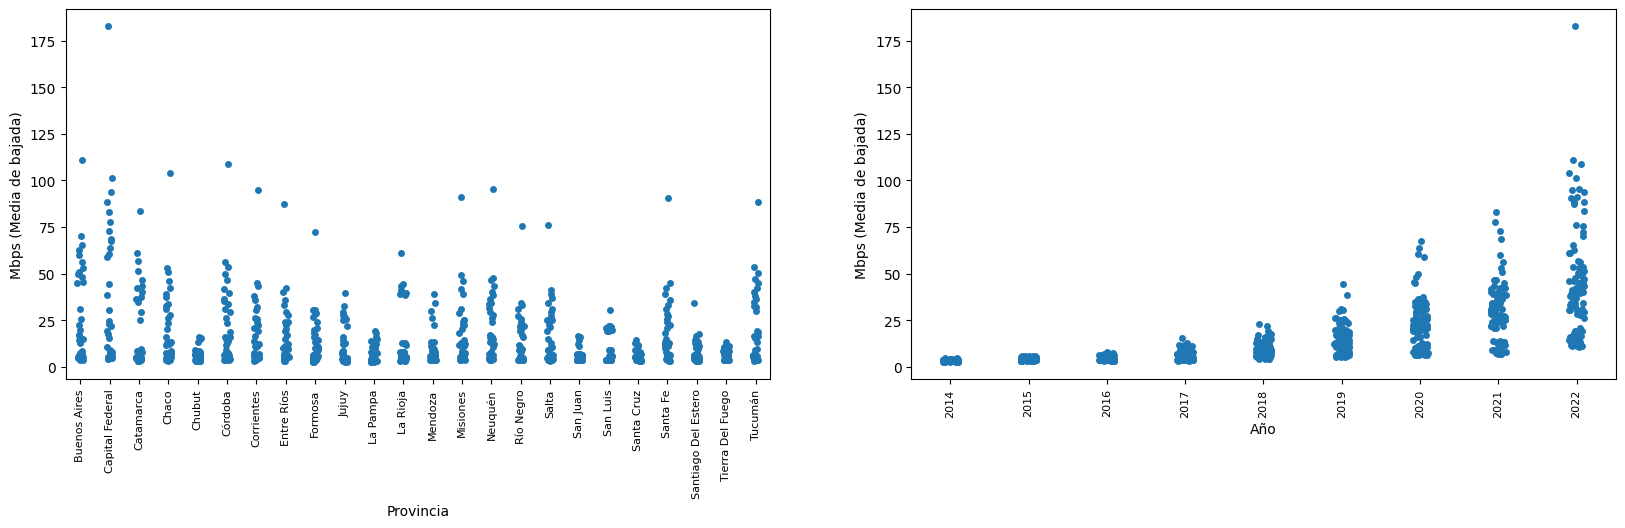

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.stripplot(data=Acceso_Internet_Fijo_Tech_Loc, y='Mbps (Media de bajada)', x='Provincia', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

sns.stripplot(data=Acceso_Internet_Fijo_Tech_Loc, y='Mbps (Media de bajada)', x='Año', ax=ax2) 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
plt.show()

**Conclusión para Outliers:** Aunque existen **20** outlieers podemos observar que son valores **NO** erróneos de una velocidad de descarga mayor a la habitual que se puede deber al acceso a mejores tecnologías en los últimos años. Cómo también el mayor outlier de valor **182** lo podemos encontrar en la capital **Capital Federal** que es más posible tenga acceso a un mejor internet. 

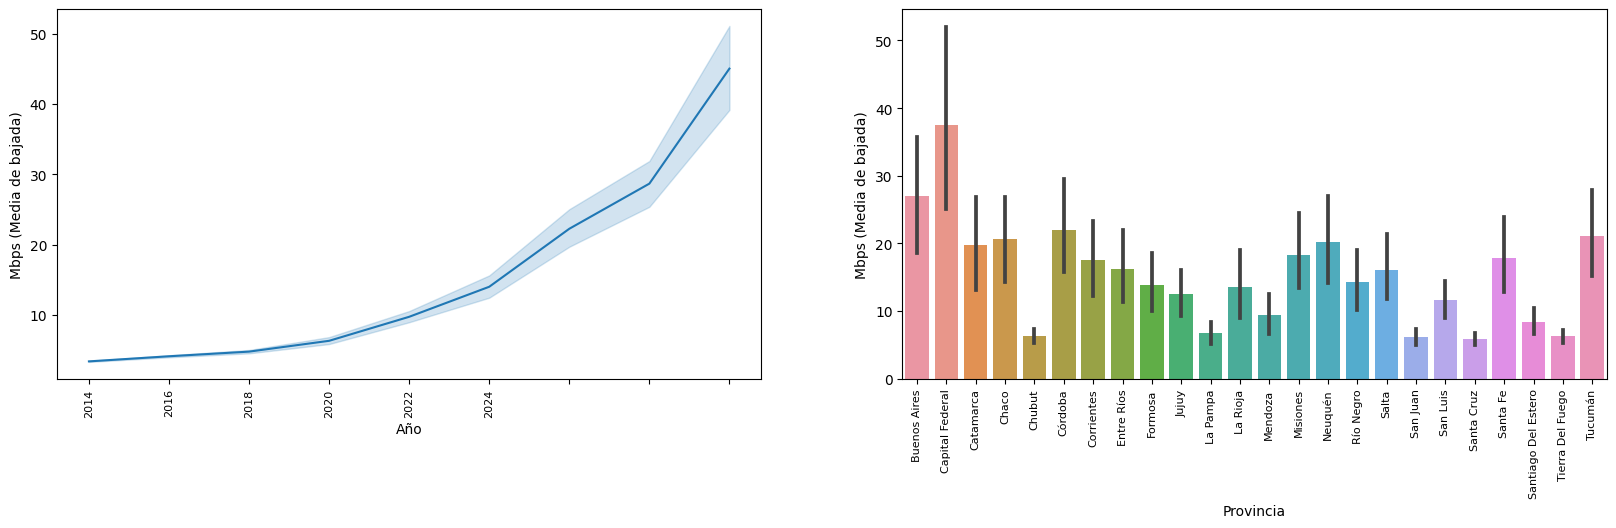

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.lineplot(data=Acceso_Internet_Fijo_Tech_Loc, y='Mbps (Media de bajada)', x='Año', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

sns.barplot(data=Acceso_Internet_Fijo_Tech_Loc, y='Mbps (Media de bajada)', x='Provincia', ax =ax2)
ax2.set_xticks(ax2.get_xticks(),labels=ax2.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
plt.show()

**Conclusión:** Podemos observar que el internet va aumentado sus velocidades **MBps** a través del tiempo, es esperado debido al mejoramiento tecnológico de igual forma podemos observar que las provincias más grandes como buenos aires o Capital Federal son las que tienen acceso a mejores servicios de internet. 

### **Acceso Nacional Internet Fijo Banda Ancha** <a class="anchor" id=segunda></a>

In [10]:
Acceso_BAF = pd.read_excel("Dataset\Internet_Acceso_Nacional_BAF.xlsx")

In [11]:
Acceso_BAF.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


In [12]:
etl.check_duplicated(Acceso_BAF)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total


> No se encontraron duplicados

In [13]:
nulls_Acceso_BAF = Acceso_BAF.isnull().sum()
nulls_Acceso_BAF

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64

> Se encontraron **2** valores nulos en el apartado **Dial up**

In [14]:
Outliers_Acceso_BAF = Acceso_BAF[['Año','Trimestre','Banda ancha fija','Dial up']]
Out_Acceso_BAF = etl.find_outliers_3sigma(Outliers_Acceso_BAF)
print(len(Out_Acceso_BAF))
print(Out_Acceso_BAF)


69
[(4788466, 'Banda ancha fija'), (4715469, 'Banda ancha fija'), (4660984, 'Banda ancha fija'), (4549131, 'Banda ancha fija'), (4502772, 'Banda ancha fija'), (4246425, 'Banda ancha fija'), (4127167, 'Banda ancha fija'), (4054936, 'Banda ancha fija'), (4028195, 'Banda ancha fija'), (3932211, 'Banda ancha fija'), (3772480, 'Banda ancha fija'), (3702985, 'Banda ancha fija'), (3681120, 'Banda ancha fija'), (3950114, 'Banda ancha fija'), (3845594, 'Banda ancha fija'), (3736563, 'Banda ancha fija'), (3626502, 'Banda ancha fija'), (3599714, 'Banda ancha fija'), (3490134, 'Banda ancha fija'), (3464882, 'Banda ancha fija'), (3171206, 'Banda ancha fija'), (3046758, 'Banda ancha fija'), (3067430, 'Banda ancha fija'), (3178174, 'Banda ancha fija'), (3131499, 'Banda ancha fija'), (3075387, 'Banda ancha fija'), (3032776, 'Banda ancha fija'), (2929903, 'Banda ancha fija'), (2946743, 'Banda ancha fija'), (2916070, 'Banda ancha fija'), (2871079, 'Banda ancha fija'), (2847076, 'Banda ancha fija'), (280

> Se encontraron **69** outliers de los cuales **36** pertenecen a **Banda ancha fija** y **33** a **Dial up**

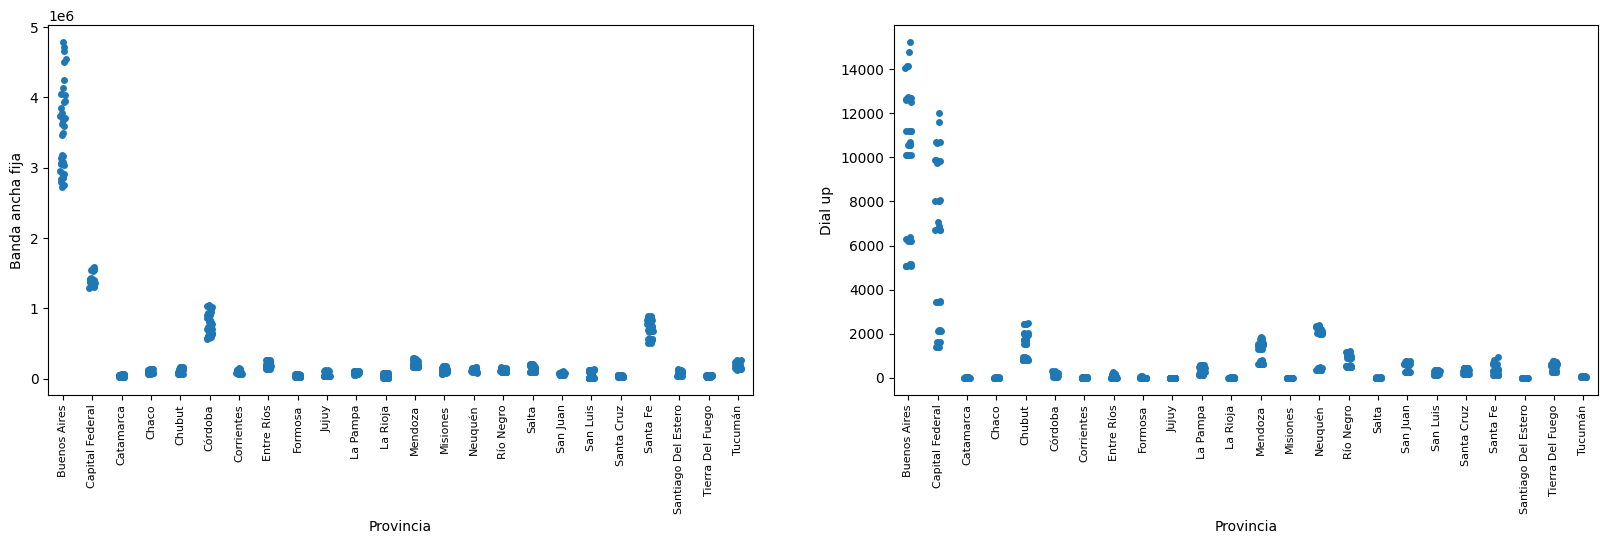

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.stripplot(data=Acceso_BAF, y='Banda ancha fija', x='Provincia', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

sns.stripplot(data=Acceso_BAF, y='Dial up', x='Provincia', ax=ax2) 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
plt.show()

**Conclusión para Outliers:** Se observa que los **69** outliers se deben a que en las ciudades grandes o zonas de una población con mayor densidad un mayor número de conexiones, pero siguen siendo datos válidos y esperados.

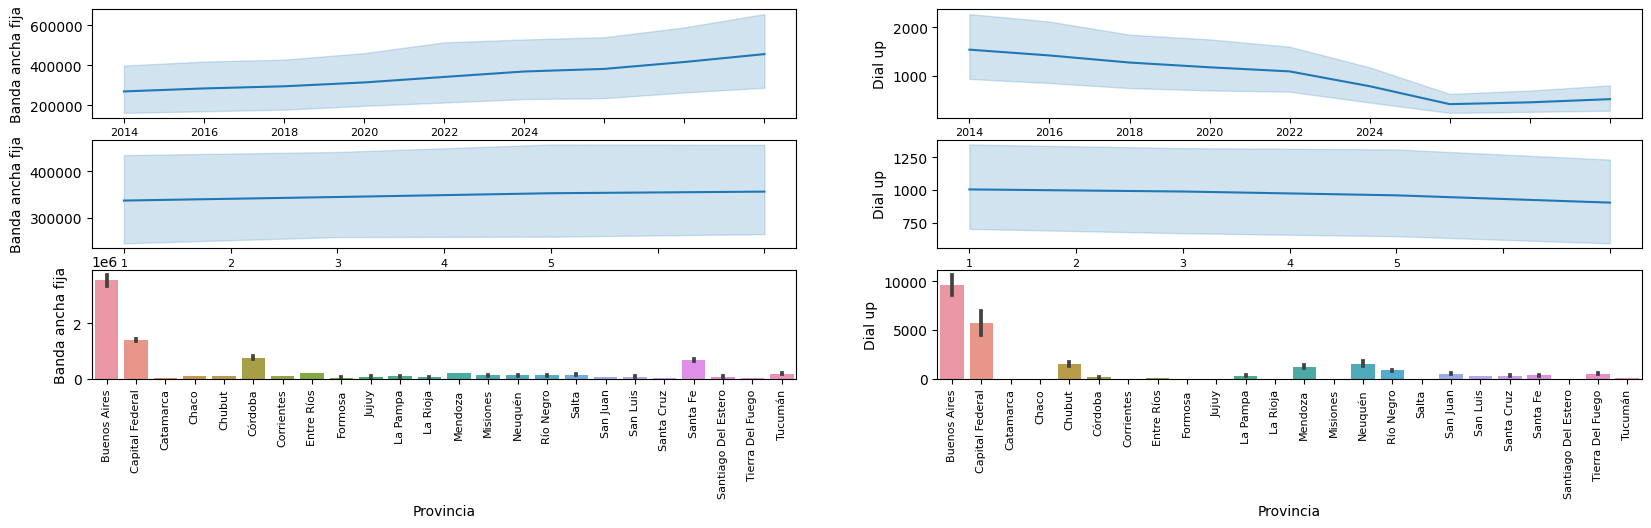

In [16]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2)

sns.lineplot(data=Acceso_BAF, y='Banda ancha fija', x='Año', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=8)

sns.lineplot(data=Acceso_BAF, y='Dial up', x='Año', ax=ax2) 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=8)

sns.lineplot(data=Acceso_BAF, y='Banda ancha fija', x='Trimestre', ax =ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0, fontsize=8)

sns.lineplot(data=Acceso_BAF, y='Dial up', x='Trimestre', ax=ax4) 
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0, fontsize=8)

sns.barplot(data=Acceso_BAF, y='Banda ancha fija', x='Provincia', ax =ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90, fontsize=8)

sns.barplot(data=Acceso_BAF, y='Dial up', x='Provincia', ax=ax6) 
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
plt.show()

**Conclusión:** Hemos observado cómo las conexiones de **banda ancha** han aumentado con el tiempo, mientras que las de **dial up** han disminuido. Este es un valor esperado, ya que la tecnología dial up está en desuso por ser **obsoleta**. También hemos confirmado lo observado en los outliers: las provincias con mayor densidad de población tienen más conexiones tanto de dial up como de banda ancha, mientras que las provincias más pequeñas tienen mayor proporción de conexiones de dial up. Podemos asumir que esta tecnología, por ser más antigua, tuvo más tiempo para llegar a más usuarios.

### **Internet Acceso Trimestral Por Tecnología** <a class="anchor" id=tercera></a>

In [17]:
Internet_Por_Tecnologia = pd.read_excel("Dataset\Internet_Accesos-Por-Tecnologia_Trimestral.xlsx")

In [18]:
Internet_Por_Tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


In [19]:
etl.check_duplicated(Internet_Por_Tecnologia)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo


> No se encontraron duplicados

In [20]:
nulls_Internet_Por_Tecnologia = Internet_Por_Tecnologia.isnull().sum()
nulls_Internet_Por_Tecnologia

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

> No se encontraron valores nulos

In [21]:
Outliers_Internet_Por_Tecnologia = Internet_Por_Tecnologia[['ADSL','Cablemodem','Fibra óptica','Wireless','Otros']]
Out_Internet_Por_Tecnologia = etl.find_outliers_3sigma(Outliers_Internet_Por_Tecnologia)
print(len(Out_Internet_Por_Tecnologia))
print(Out_Internet_Por_Tecnologia)


0
[]


> No se encontraron Outliers

In [23]:
Internet_Por_Tecnologia_melted = pd.melt(Internet_Por_Tecnologia, id_vars='Año', 
                                          value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], 
                                          var_name='variable', value_name='value')
Internet_Por_Tecnologia_melted.head()

,Año,variable,value
0,2022,ADSL,1315373
1,2022,ADSL,1395277
2,2022,ADSL,1468333
3,2022,ADSL,1533240
4,2021,ADSL,1657615


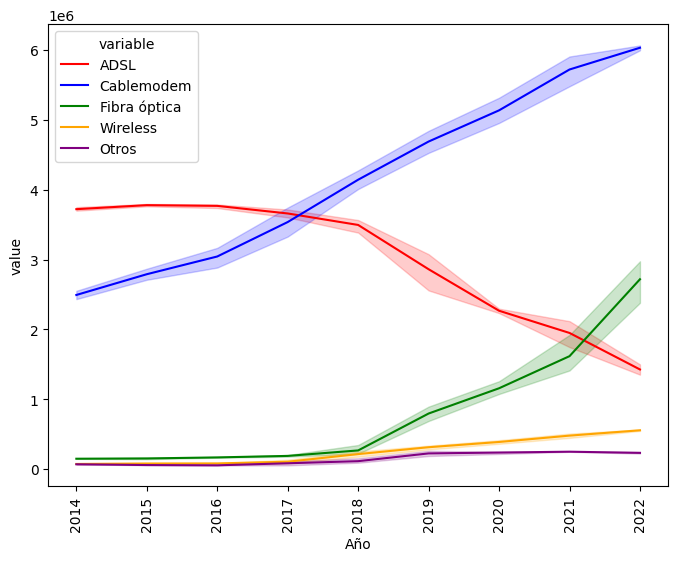

In [24]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot all the lines in one graph using hue argument
sns.lineplot(data=Internet_Por_Tecnologia_melted, x='Año', y='value', hue='variable', 
             palette=['red', 'blue', 'green', 'orange', 'purple'])

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Conclusión:** En este análisis, podemos observar cómo las conexiones a través de **ADSL van en desuso**, ya que se trata de la tecnología más antigua y obsoleta. Por el contrario, las conexiones más novedosas, como Wireless, Fibra Óptica y Cable Modem, cuentan con un mayor público, siendo esta última la más utilizada según los datos más recientes. En varias tecnologías, observamos un **pico en el año 2018**, que puede deberse a que en ese año hubo varios esfuerzos en el área tecnológica en Argentina para mejorar los servicios. Uno de estos fue el Plan Nacional de Telecomunicaciones y Conectividad, que tenía como objetivo **ampliar la cobertura de fibra óptica en el país**. Finalmente, observamos que la tecnología de fibra óptica, por ser la más novedosa y la que mejor servicio brinda, es la tecnología con mayor crecimiento en los últimos años.

### **Internet Acceso Velocidad por Provincia** <a class="anchor" id=cuarta></a>

In [ ]:
Internet_Acceso_Velocidad_Provincia = pd.read_excel("Dataset\Internet_Accesos-Por-Velocidad_Provincia_Trimestral.xlsx")

In [ ]:
Internet_Acceso_Velocidad_Provincia.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
etl.check_duplicated(Internet_Acceso_Velocidad_Provincia)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps


In [ ]:
nulls_Internet_Acceso_Velocidad_Provincia = Internet_Acceso_Velocidad_Provincia.isnull().sum()
nulls_Internet_Acceso_Velocidad_Provincia

Año            1
Trimestre      1
Provincia      1
Otros         25
0,256 Mbps    25
              ..
5125 Mbps     25
6000 Mbps     25
7000 Mbps     25
8000 Mbps     25
10000 Mbps    25
Length: 186, dtype: int64

> Se encontraron 25 nulos en todas las columnas debido a un error de sintaxis en los datos importados, ya que en el origen provienen de un link, se decidió borrarlos ya que representan menos del 5% del dataset

In [ ]:
Internet_Acceso_Velocidad_Provincia.replace('#SYNTAX',np.nan,inplace=True)
Internet_Acceso_Velocidad_Provincia.dropna(inplace=True)

In [ ]:
nulls_Internet_Acceso_Velocidad_Provincia = Internet_Acceso_Velocidad_Provincia.isnull().sum()
nulls_Internet_Acceso_Velocidad_Provincia

Año           0
Trimestre     0
Provincia     0
Otros         0
0,256 Mbps    0
             ..
5125 Mbps     0
6000 Mbps     0
7000 Mbps     0
8000 Mbps     0
10000 Mbps    0
Length: 186, dtype: int64

In [ ]:
Outliers_Internet_Acceso_Velocidad_Provincia = Internet_Acceso_Velocidad_Provincia.drop(['Año','Trimestre','Provincia'], axis=1)
Out_Internet_Acceso_Velocidad_Provincia = etl.find_outliers_3sigma(Outliers_Internet_Acceso_Velocidad_Provincia)
print(len(Out_Internet_Acceso_Velocidad_Provincia))
print(Out_Internet_Acceso_Velocidad_Provincia)


129
[(106772.0, 'Otros'), (32.0, '0,256 Mbps'), (225.0, '0,375 Mbps'), (111.0, '0,625 Mbps'), (28724.0, '0,5 Mbps'), (192.0, '0,512 Mbps'), (4611.0, '0,75 Mbps'), (18736.0, '1 Mbps'), (25.0, '1,25 Mbps'), (1348.0, '1,5 Mbps'), (21152.0, '2 Mbps'), (21.0, '2,2 Mbps'), (154.0, '2,5 Mbps'), (53034.0, '3 Mbps'), (4.0, '3,3 Mbps'), (41976.0, '3,5 Mbps'), (65.0, '4,5 Mbps'), (32973.0, '5 Mbps'), (96230.0, '6 Mbps'), (7.0, '6,4 Mbps'), (10945.0, '7 Mbps'), (984.0, '7,5 Mbps'), (64913.0, '8 Mbps'), (1761.0, '9 Mbps'), (204191.0, '10 Mbps'), (70.0, '10,2 Mbps'), (87.0, '11 Mbps'), (10.0, '12,3 Mbps'), (212.0, '13 Mbps'), (44.0, '14 Mbps'), (85876.0, '15 Mbps'), (1108.0, '16 Mbps'), (2.0, '17 Mbps'), (725.0, '18 Mbps'), (135315.0, '20 Mbps'), (1.0, '20,5 Mbps'), (3.0, '21 Mbps'), (3.0, '21 Mbps'), (1.0, '22 Mbps'), (1.0, '22 Mbps'), (18.0, '23 Mbps'), (8547.0, '24 Mbps'), (78376.0, '25 Mbps'), (111.0, '25,1 Mbps'), (31.0, '25,5 Mbps'), (1.0, '26 Mbps'), (1.0, '27 Mbps'), (777236.0, '30 Mbps'), (

> Encontramos **129 Outliers** de diferentes **velocidades**. Se procede a ver gráficamente las posibles causas

<Axes: xlabel='Provincia', ylabel='value'>

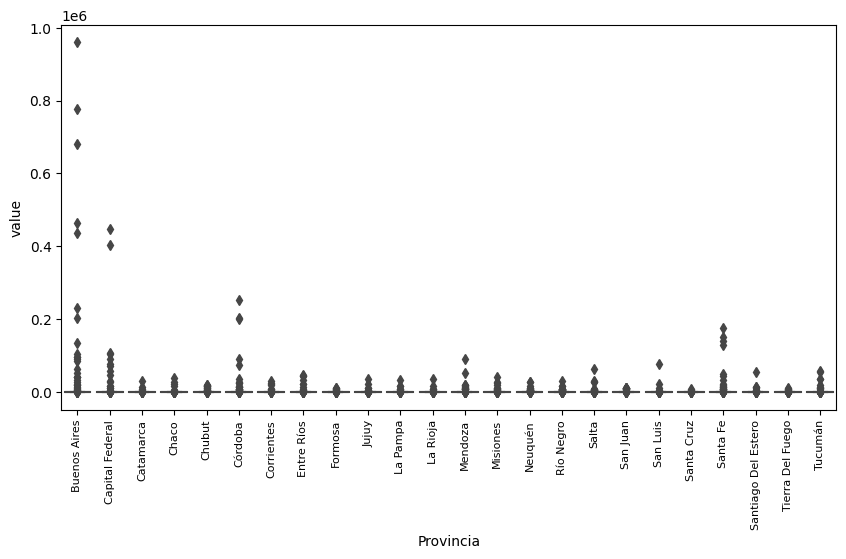

In [ ]:
dfm = pd.melt(Internet_Acceso_Velocidad_Provincia, id_vars='Provincia', value_vars= Internet_Acceso_Velocidad_Provincia[3:])
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
sns.boxplot(x='Provincia', y='value', data=dfm, ax=ax)
# sns.stripplot(x='Provincia', y='value', data=dfm, ax=ax, jitter=0.1, dodge=True)


**Conclusión Outliers:** Se procedió a hacer una transformación de nuestra dataset en donde en nuestro **eje X tenemos las provincias** y el **eje Y las velocidades**, podemos observar que los outliers es debido a que en algunas provincias hay muchas más de algún tipo de conexión que de otras. Es un resultado natural debido al tipo de servicio ofrecido por provincia.

In [ ]:
most_velocity = etl.most_common_velocity(Internet_Acceso_Velocidad_Provincia)
print('Promedio:', most_velocity['Mayor velocidad'].median())
print('Media:',most_velocity['Mayor velocidad'].mean())
print('Max:',most_velocity['Mayor velocidad'].max())
print('Min:',most_velocity['Mayor velocidad'].min())

Promedio: 50.0
Media: 60.895833333333336
Max: 300.0
Min: 3.5


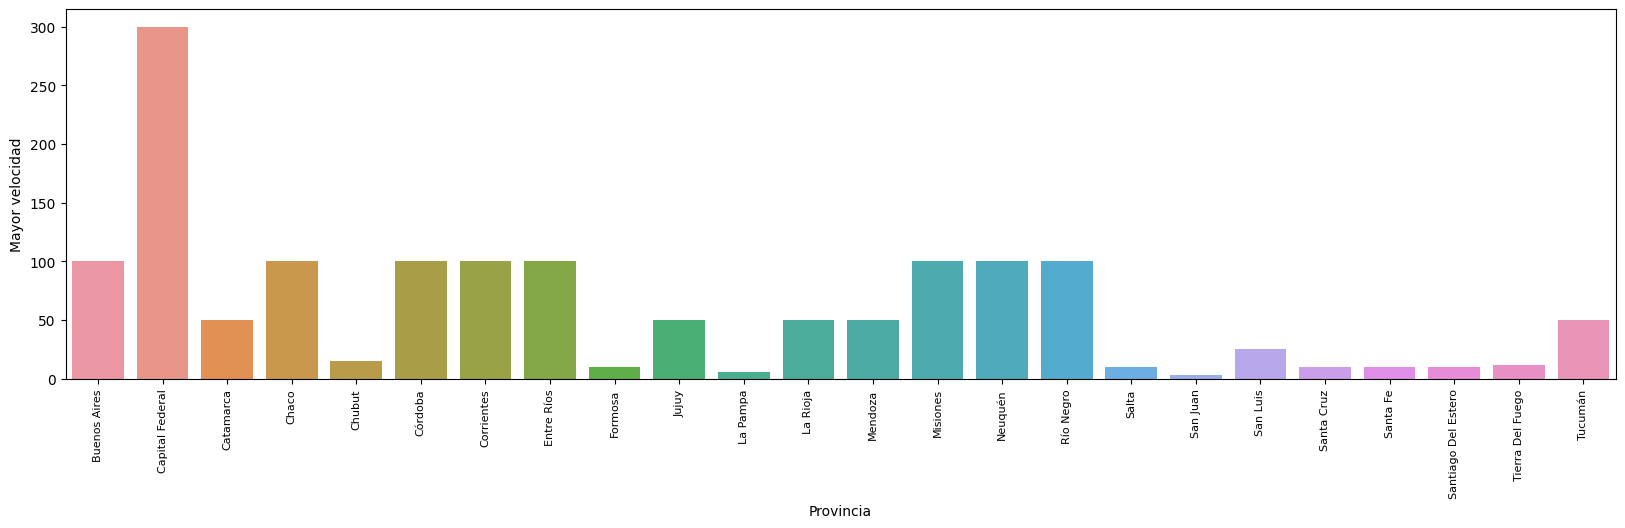

In [ ]:
fig, (ax1) = plt.subplots(1,1)

sns.barplot(data=most_velocity, y='Mayor velocidad', x='Provincia', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
plt.show()

**Conclusión:** Podemos observar que la capital no solo cuenta con velocidades superiores al resto de la provincias sino que el servicio **más usado es el de 300 Mbps**. En general observamos un **promedio de 60 Mbps y una media de 50 Mbps** en los servicios más comunes y la provincia de San Juan con las **menores velocidades de 3.5 Mbps**.

### **Ingresos Trimestras Por Servicio de Internet** <a class="anchor" id=quinta></a>

In [ ]:
Internet_Ingresos_Trimestral = pd.read_excel("Dataset\Internet_Ingresos.xlsx")

In [ ]:
Internet_Ingresos_Trimestral.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [ ]:
etl.check_duplicated(Internet_Ingresos_Trimestral)

,Año,Trimestre,Ingresos (miles de pesos),Periodo


> **No se encontraron duplicados**

In [ ]:
nulls_AIFTL = Internet_Ingresos_Trimestral.isnull().sum()
nulls_AIFTL

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

> **No se encontraron valores nulos**

In [ ]:
Outliers_Internet_Ingresos_Trimestral = Internet_Ingresos_Trimestral[['Ingresos (miles de pesos)']]
Out_Internet_Ingresos_Trimestral = etl.find_outliers_3sigma(Outliers_Internet_Ingresos_Trimestral)
print(len(Out_Internet_Ingresos_Trimestral))
print(Out_Internet_Ingresos_Trimestral)


0
[]


> **No se enconraron valores nulos**

In [ ]:
Anual_Internet_Ingresos_Trimestral = Internet_Ingresos_Trimestral[['Año','Ingresos (miles de pesos)']]

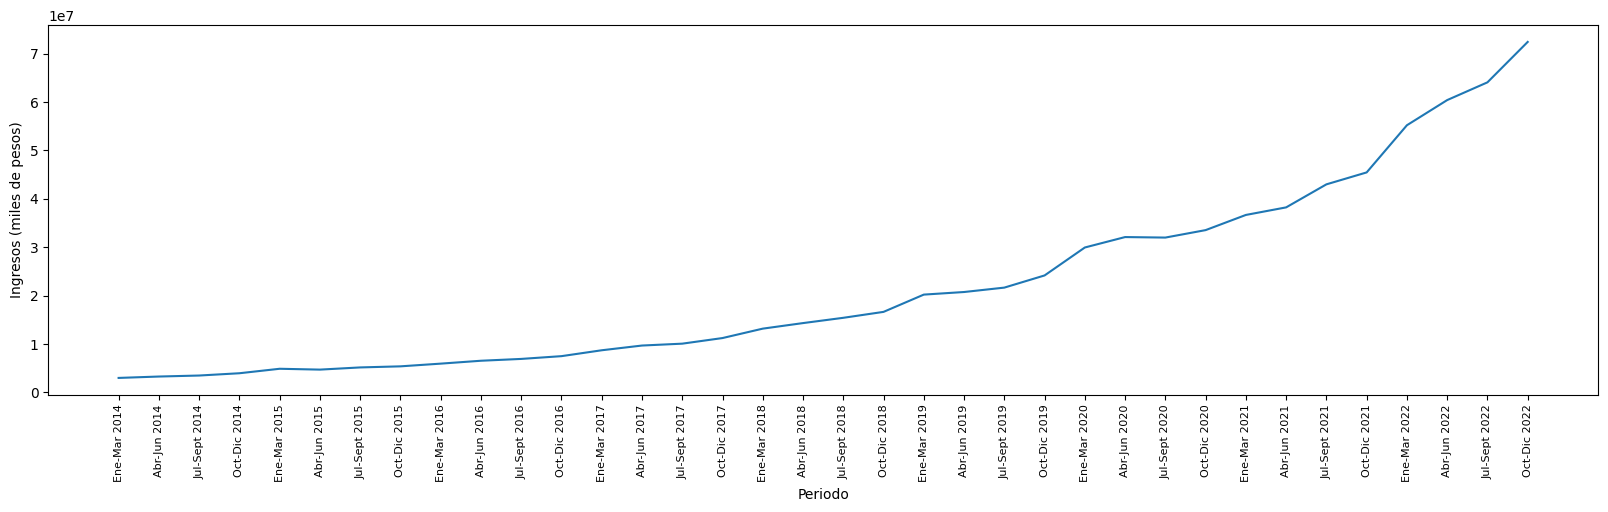

In [ ]:
fig, (ax1) = plt.subplots(1,1)

sns.lineplot(data=Internet_Ingresos_Trimestral, y='Ingresos (miles de pesos)', x='Periodo', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
ax1.invert_xaxis()
plt.show()

**Conclusión:** Se puede ver un incremento gradual de los ingresos por el servicio de internet. 

### **Internet Penetración Hogares** <a class="anchor" id=sexta></a>

In [ ]:
Internet_Penetracion_Hogares = pd.read_excel("Dataset\Internet_Penetracion_Hogares_Nacional_Internet_Fijo.xlsx", sheet_name='Penetracion-totales')

In [ ]:
Internet_Penetracion_Hogares.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,77.210000,24.150000,Oct-Dic 2022
1,2022,3,76.640000,23.950000,Jul-Sept 2022
2,2022,2,75.965424,23.720442,Abr-Jun 2022
3,2022,1,73.878803,23.049171,Ene-Mar 2022
4,2021,4,73.176397,22.810702,Oct-Dic 2021


In [ ]:
etl.check_duplicated(Internet_Penetracion_Hogares)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo


> **No se encontraron valores duplicados**

In [ ]:
nulls_Internet_Penetracion_Hogares = Internet_Penetracion_Hogares.isnull().sum()
nulls_Internet_Penetracion_Hogares

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

> **No se encontraron Valores Nulos**

In [ ]:
Outliers_Internet_Penetracion_Hogares = Internet_Penetracion_Hogares[['Accesos por cada 100 hab','Accesos por cada 100 hogares']]
Out_Internet_Penetracion_Hogares = etl.find_outliers_3sigma(Outliers_Internet_Penetracion_Hogares)
print(len(Out_Internet_Penetracion_Hogares))
print(Out_Internet_Penetracion_Hogares)


0
[]


> No se encontraron ouliers

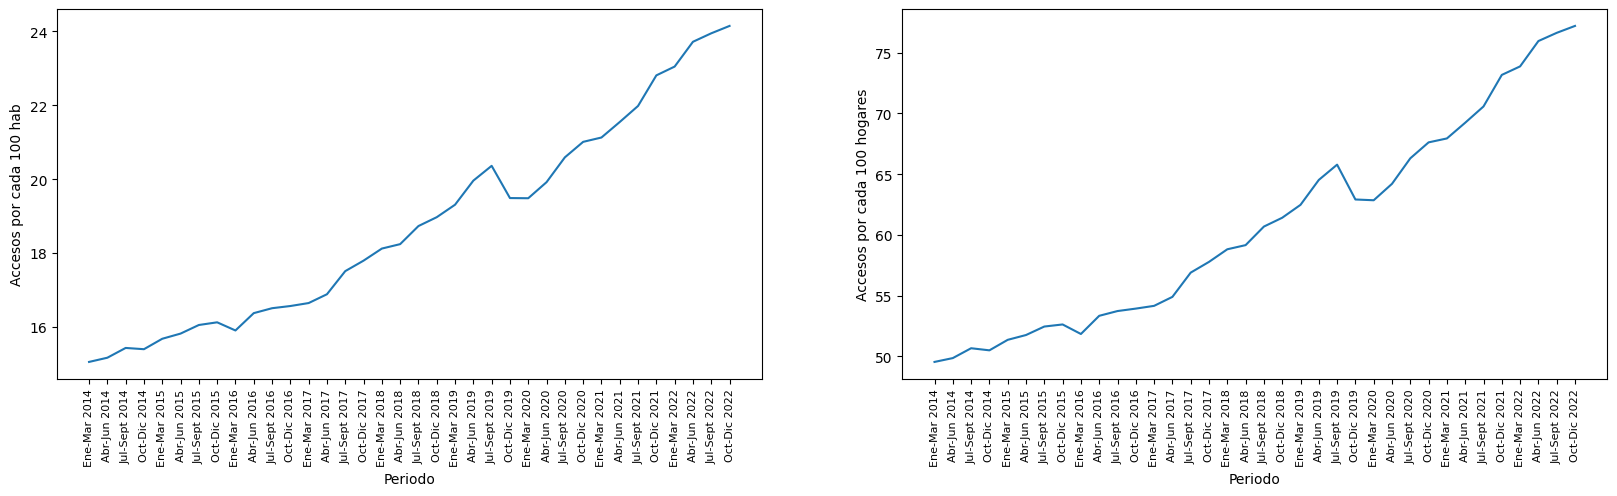

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.lineplot(data=Internet_Penetracion_Hogares, y='Accesos por cada 100 hab', x='Periodo', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

sns.lineplot(data=Internet_Penetracion_Hogares, y='Accesos por cada 100 hogares', x='Periodo', ax=ax2) 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
ax1.invert_xaxis()
ax2.invert_xaxis()
plt.show()

> **Conclusión:** Aunque el acceso por hogar se puede ver bastante alto hasta un **75% de los hogares** para Dic de 2022, en cuánto a habitantes se ve bastante reducido apenas un 25% para la misma fecha. Si bien ambas incrementan con el tiempo no pudimos llegar a ninguna conclusión fehaciente sobre la caída en abril 2019 pero podemos asumir que uno de estos efectos se pudo deber al inico de la pandemia de COVID-19. La retoma de los servicios apartir de Oct 2019 se puede deber al cambio de gobierno que ocurrió en la misma fecha.

### **Internet Acceso Velocidad Rango** <a class="anchor" id=septima></a>

In [ ]:
Internet_Acceso_Velocidad_Rango = pd.read_excel("Dataset\Internet_Rango_Accesos-Por-Velocidad.xlsx", sheet_name='Totales')

In [ ]:
Internet_Acceso_Velocidad_Rango.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


In [ ]:
etl.check_duplicated(Internet_Acceso_Velocidad_Rango)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total


> **No se encontraron valores duplicados**

In [ ]:
nulls_Internet_Acceso_Velocidad_Rango = Internet_Acceso_Velocidad_Rango.isnull().sum()
nulls_Internet_Acceso_Velocidad_Rango

Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64

>**No se encontraron valores nulos**

In [ ]:
Outliers_Internet_Acceso_Velocidad_Rango = Internet_Acceso_Velocidad_Rango[['Hasta 512 kbps','Entre 512 Kbps y 1 Mbps','Entre 1 Mbps y 6 Mbps','Entre 6 Mbps y 10 Mbps','Entre 10 Mbps y 20 Mbps','Entre 20 Mbps y 30 Mbps','Más de 30 Mbps']]
Out_Internet_Acceso_Velocidad_Rango = etl.find_outliers_3sigma(Outliers_Internet_Acceso_Velocidad_Rango)
print(len(Out_Internet_Acceso_Velocidad_Rango))
print(Out_Internet_Acceso_Velocidad_Rango)


1
[(241713, 'Hasta 512 kbps')]


> **Se encontró un outlier en la velocidad más baja, pueden pasar una de dos cosas, o muchas o muy pocas personas tienen este servicio, procedemos a gráficar para verlo a detalle**

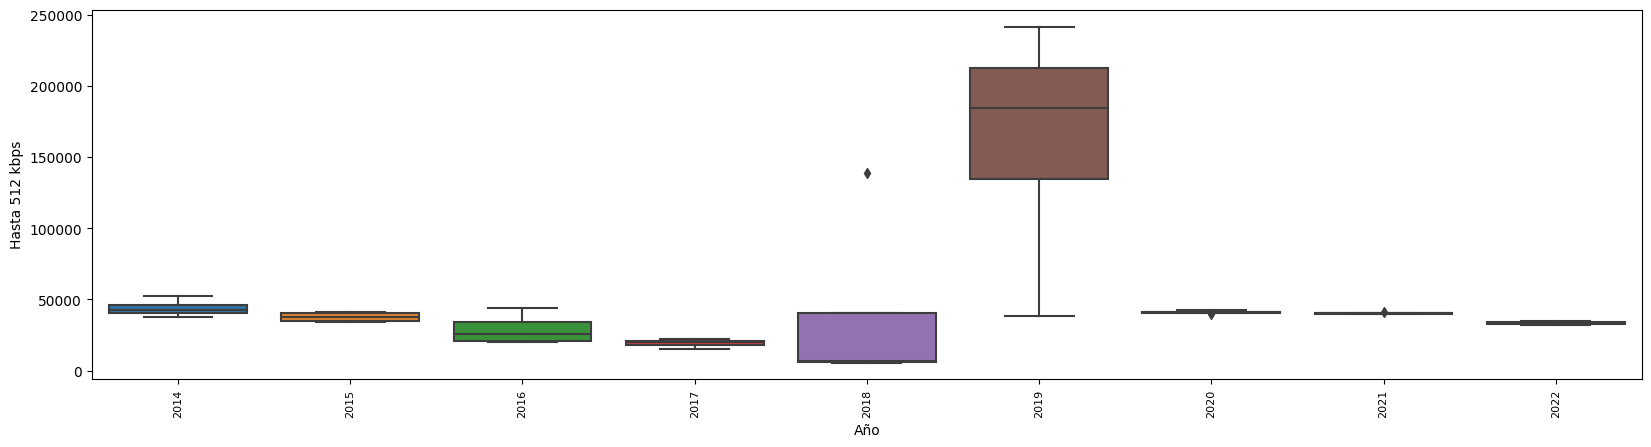

In [ ]:
fig, (ax1) = plt.subplots(1,1)

sns.boxplot(data=Internet_Acceso_Velocidad_Rango, y='Hasta 512 kbps', x='Año', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
plt.show()

**Conlcusión Outliers:** Como podemos observar provienen del año 2019, lo podemos relacionar con la caída de usuarios del gráfico anterior "Penetración de Internet en Hogares" en el mismo período, una posible causa fue que algunos usuarios decantaron por cambiar a un plan más bajo en lugar de quitar el servicio.

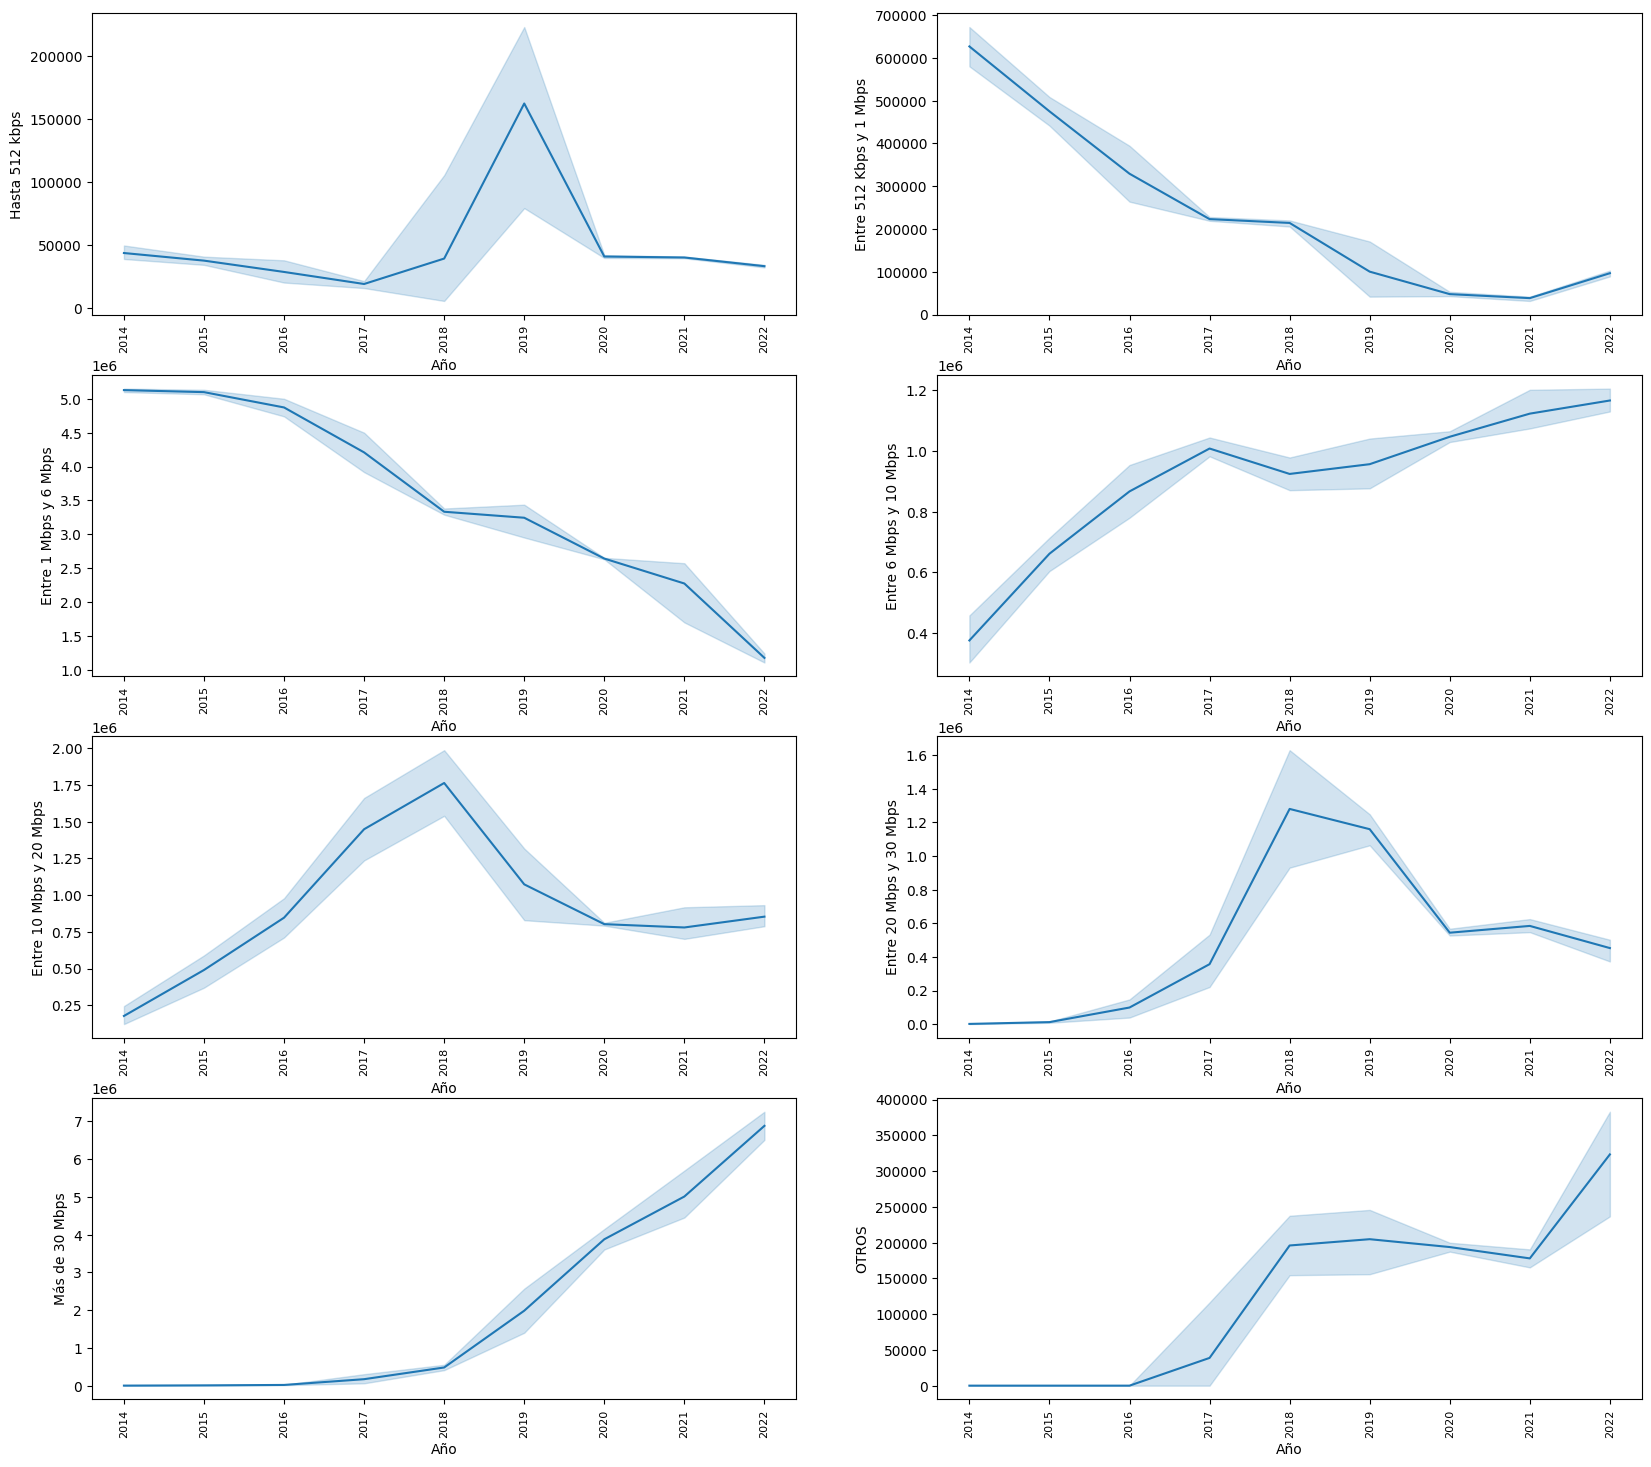

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20, 18))

sns.lineplot(data=Internet_Acceso_Velocidad_Rango, y='Hasta 512 kbps', x='Año', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

sns.lineplot(data=Internet_Acceso_Velocidad_Rango, y='Entre 512 Kbps y 1 Mbps', x='Año', ax =ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=8)

sns.lineplot(data=Internet_Acceso_Velocidad_Rango, y='Entre 1 Mbps y 6 Mbps', x='Año', ax =ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, fontsize=8)

sns.lineplot(data=Internet_Acceso_Velocidad_Rango, y='Entre 6 Mbps y 10 Mbps', x='Año', ax =ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90, fontsize=8)

sns.lineplot(data=Internet_Acceso_Velocidad_Rango, y='Entre 10 Mbps y 20 Mbps', x='Año', ax =ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90, fontsize=8)

sns.lineplot(data=Internet_Acceso_Velocidad_Rango, y='Entre 20 Mbps y 30 Mbps', x='Año', ax =ax6)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90, fontsize=8)

sns.lineplot(data=Internet_Acceso_Velocidad_Rango, y='Más de 30 Mbps', x='Año', ax =ax7)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90, fontsize=8)

sns.lineplot(data=Internet_Acceso_Velocidad_Rango, y='OTROS', x='Año', ax =ax8)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
plt.show()

**Conclusión:** Observamos cómo las velocidades por debajo de los 6 Mbps cada vez son menos frecuentes y más en desuso. Así como también vemos que las altas velocidades por sobre los 30 Mbps tienen un constante crecimiento en su número de usuarios. Las velocidades intermedias no siguen un patrón claro, puede deberse a muchos factores distintos pero podemos asegurar que con el tiempo las velocidades más bajas irán desapareciendo y siendo reemplazadas por mejores conexiones.

### **Internet Acceso Por Tecnología Por Provincia** <a class="anchor" id=octava></a>

In [ ]:
Internet_Acceso_Velocidad_Provincia = pd.read_excel("Dataset\Internet-Accesos-Por-Tecno_Por_Provincia.xlsx")

In [ ]:
Internet_Acceso_Velocidad_Provincia.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [ ]:
etl.check_duplicated(Internet_Acceso_Velocidad_Provincia)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general


> **No se encontraron valores duplicados**

In [ ]:
nulls_Internet_Acceso_Velocidad_Provincia = Internet_Acceso_Velocidad_Provincia.isnull().sum()
nulls_Internet_Acceso_Velocidad_Provincia

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

> **No se encontraron valores nulos**

In [ ]:
Outliers_Internet_Acceso_Velocidad_Provincia = Internet_Acceso_Velocidad_Provincia[['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']]
Out_Internet_Acceso_Velocidad_Provincia = etl.find_outliers_3sigma(Outliers_Internet_Acceso_Velocidad_Provincia)
print(len(Out_Internet_Acceso_Velocidad_Provincia))
print(Out_Internet_Acceso_Velocidad_Provincia)


125
[(15277, 'ADSL'), (11804, 'ADSL'), (18661, 'ADSL'), (138753, 'ADSL'), (10333, 'ADSL'), (19602, 'ADSL'), (47778, 'ADSL'), (13293, 'ADSL'), (10052, 'ADSL'), (14393, 'ADSL'), (14455, 'ADSL'), (12814, 'ADSL'), (16318, 'ADSL'), (18196, 'ADSL'), (37272, 'ADSL'), (46392, 'ADSL'), (103210, 'CABLEMODEM'), (119493, 'CABLEMODEM'), (131295, 'CABLEMODEM'), (80213, 'CABLEMODEM'), (1238196, 'CABLEMODEM'), (218599, 'CABLEMODEM'), (81039, 'CABLEMODEM'), (77145, 'CABLEMODEM'), (183452, 'CABLEMODEM'), (77801, 'CABLEMODEM'), (402, 'DIAL UP'), (533, 'DIAL UP'), (537, 'DIAL UP'), (155, 'DIAL UP'), (203, 'DIAL UP'), (2145, 'DIAL UP'), (200, 'DIAL UP'), (248, 'DIAL UP'), (287, 'DIAL UP'), (182, 'DIAL UP'), (215, 'DIAL UP'), (343, 'DIAL UP'), (212, 'DIAL UP'), (181, 'DIAL UP'), (227, 'DIAL UP'), (173, 'DIAL UP'), (175, 'DIAL UP'), (24204, 'FIBRA OPTICA'), (24799, 'FIBRA OPTICA'), (23820, 'FIBRA OPTICA'), (110262, 'FIBRA OPTICA'), (22285, 'FIBRA OPTICA'), (26916, 'FIBRA OPTICA'), (39486, 'FIBRA OPTICA'), (2

>**Se encontraron 125 Outliers en diferentes Tecnologias, probablemente debido que alguna tecnología es más popular en una región que las demás**

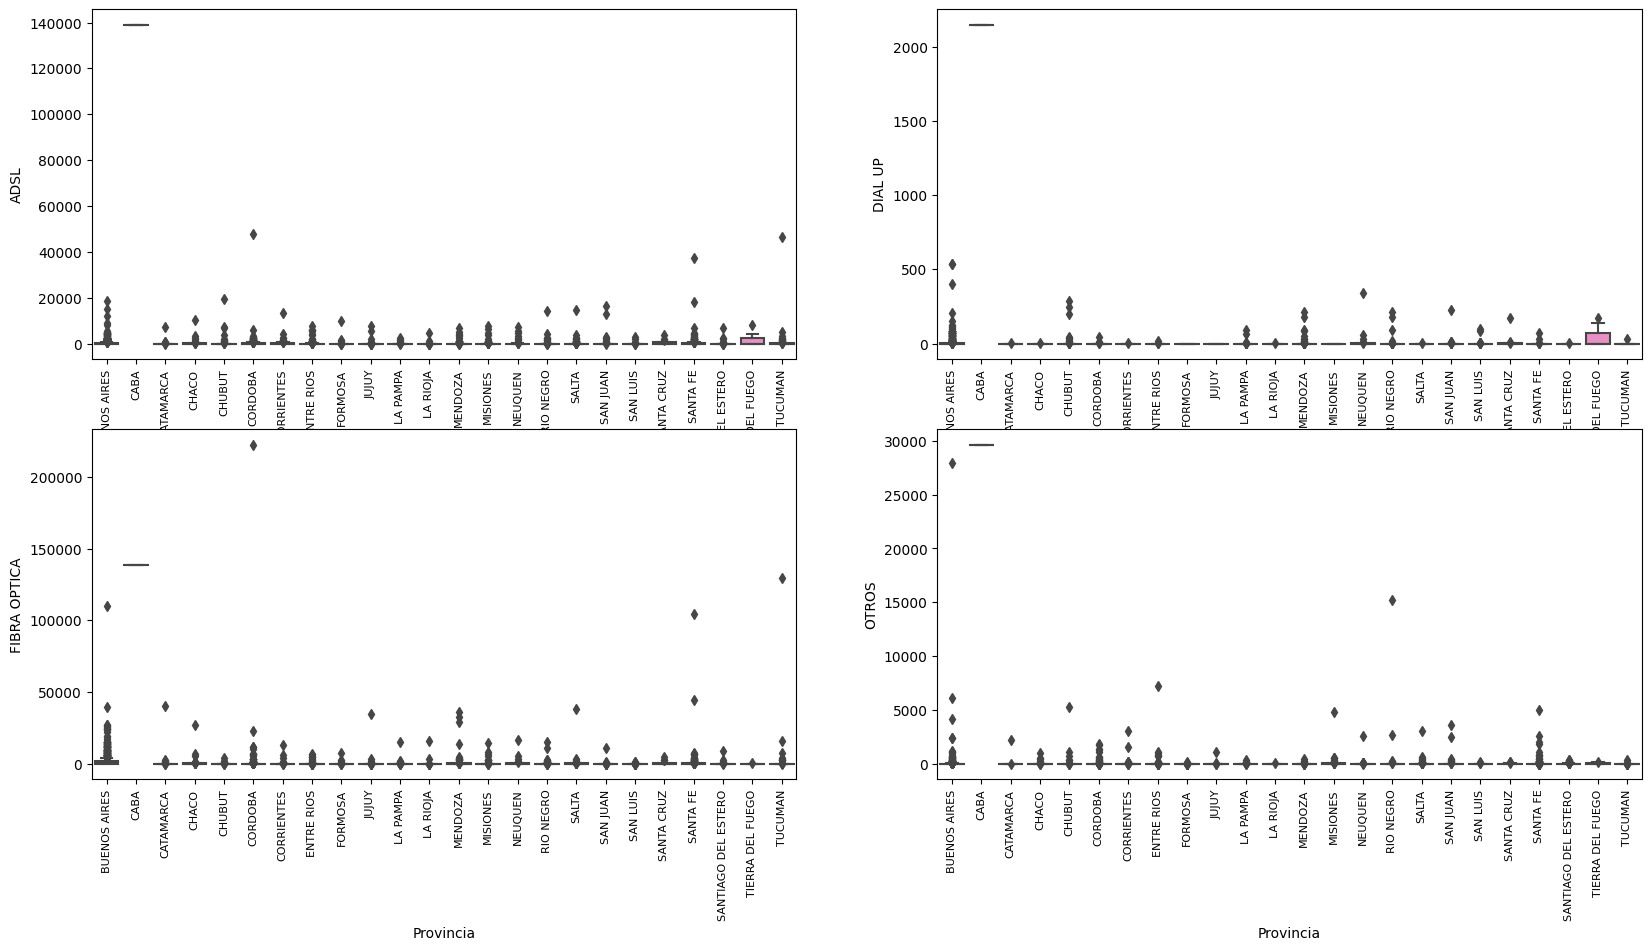

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.boxplot(data=Internet_Acceso_Velocidad_Provincia, y='ADSL', x='Provincia', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

sns.boxplot(data=Internet_Acceso_Velocidad_Provincia, y='DIAL UP', x='Provincia', ax =ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=8)

sns.boxplot(data=Internet_Acceso_Velocidad_Provincia, y='FIBRA OPTICA', x='Provincia', ax =ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, fontsize=8)

sns.boxplot(data=Internet_Acceso_Velocidad_Provincia, y='OTROS', x='Provincia', ax =ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90, fontsize=8)


ax1.figure.set_figwidth(20)
plt.show()

**Conclusión Outliers:** Podemos ver claramente que los outliers se deben a que en algunas localidades existen un mayor número de usuarios de cierta tecnología en específico.

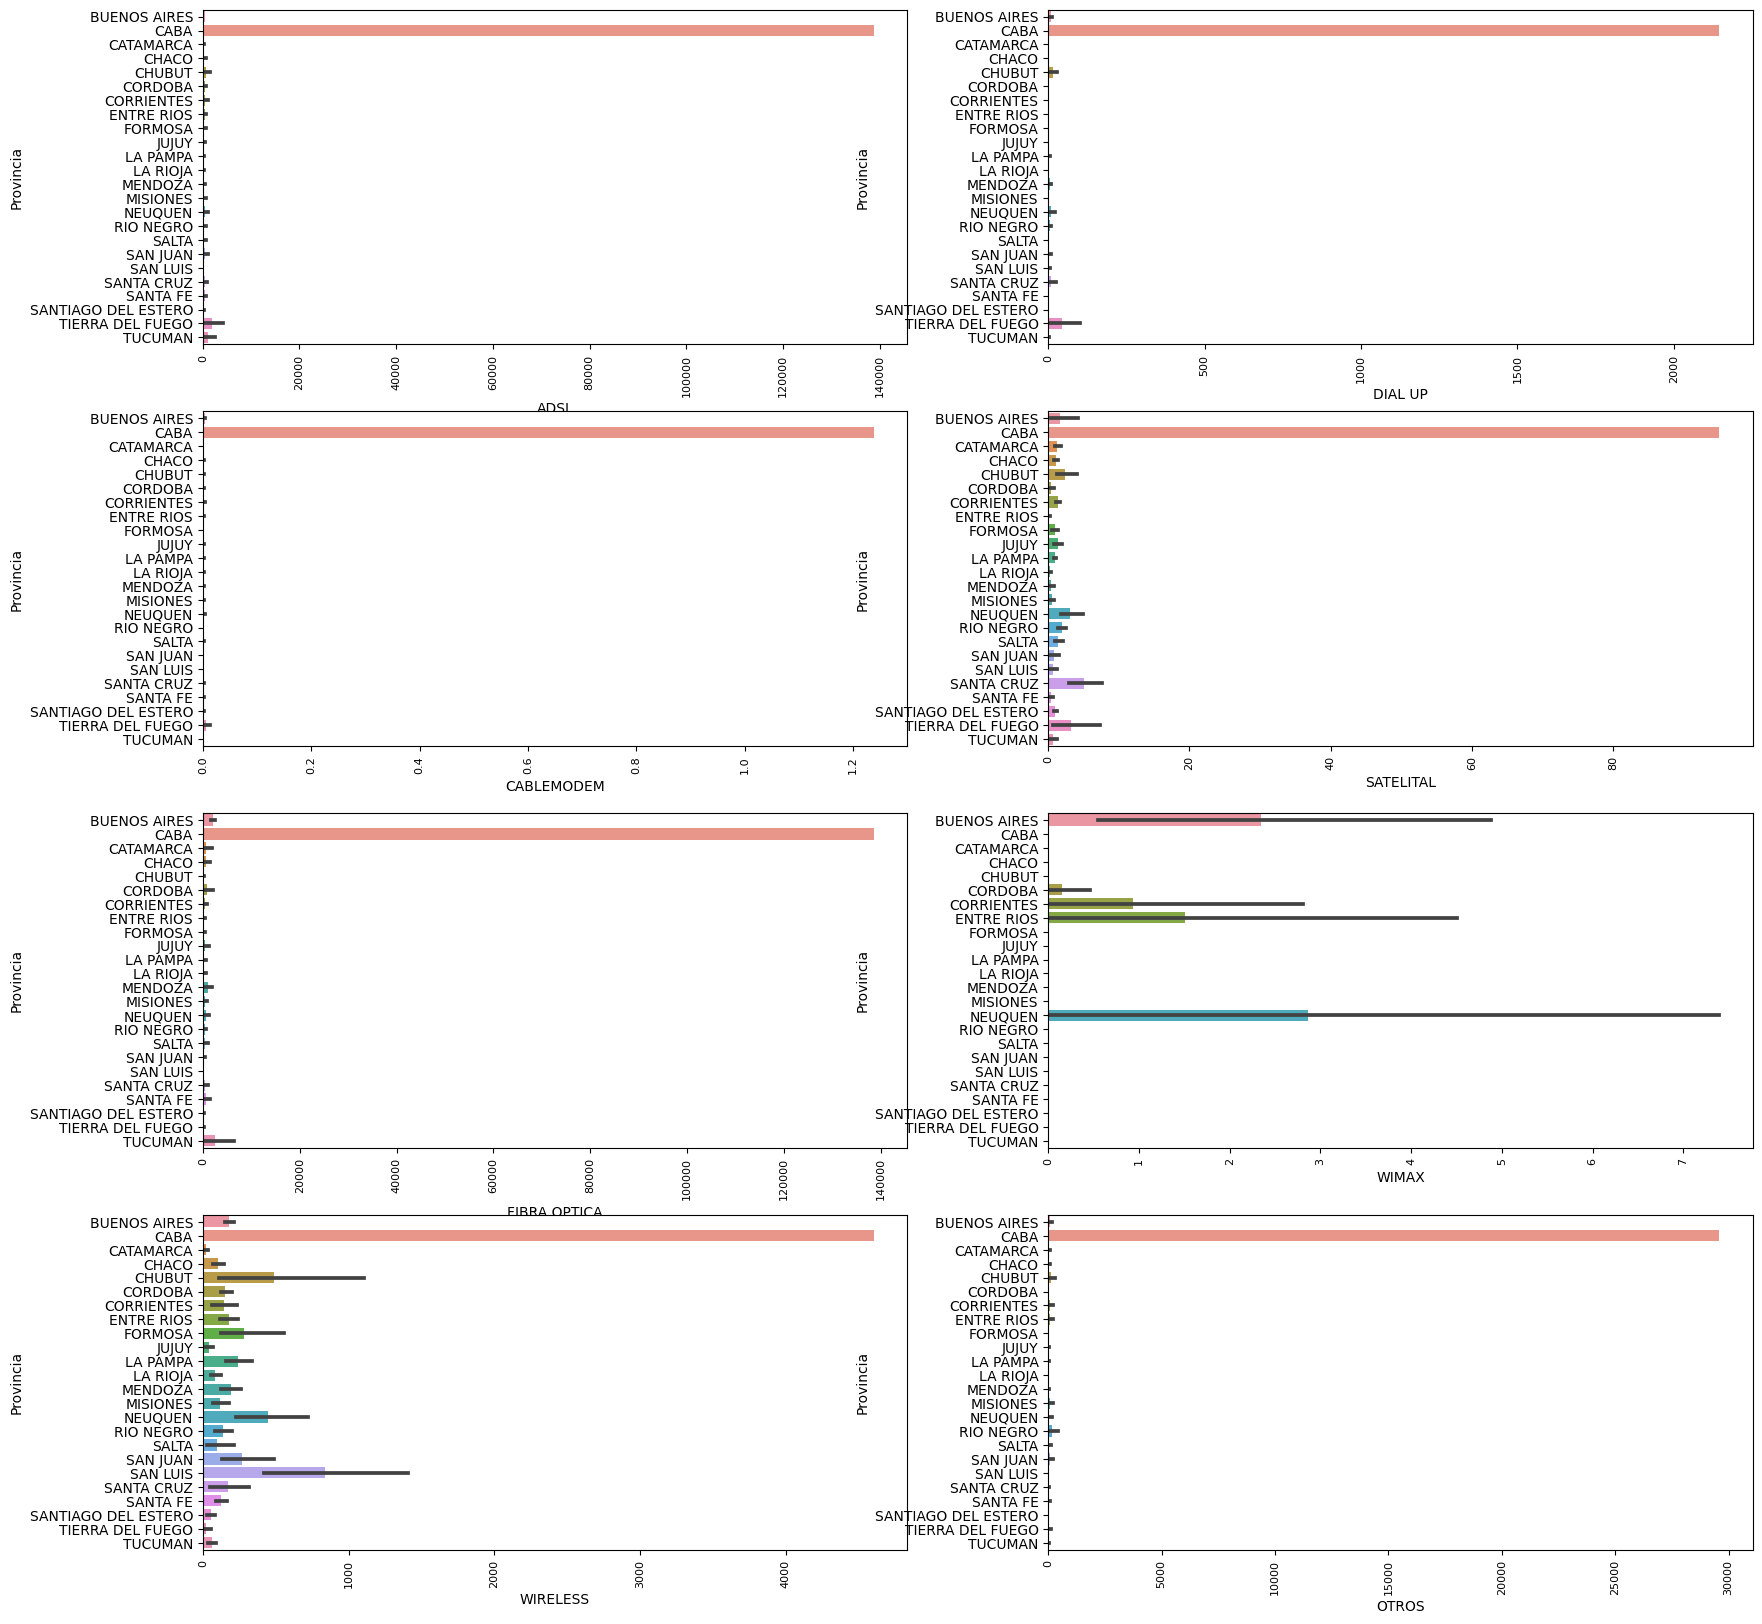

In [ ]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

sns.barplot(data=Internet_Acceso_Velocidad_Provincia,orient='h', x='ADSL', y='Provincia', ax =ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

sns.barplot(data=Internet_Acceso_Velocidad_Provincia,orient='h', x='DIAL UP', y='Provincia', ax =ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontsize=8)

sns.barplot(data=Internet_Acceso_Velocidad_Provincia,orient='h', x='CABLEMODEM', y='Provincia', ax =ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, fontsize=8)

sns.barplot(data=Internet_Acceso_Velocidad_Provincia,orient='h', x='SATELITAL', y='Provincia', ax =ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90, fontsize=8)

sns.barplot(data=Internet_Acceso_Velocidad_Provincia,orient='h', x='FIBRA OPTICA', y='Provincia', ax =ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90, fontsize=8)

sns.barplot(data=Internet_Acceso_Velocidad_Provincia,orient='h', x='WIMAX', y='Provincia', ax =ax6)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90, fontsize=8)

sns.barplot(data=Internet_Acceso_Velocidad_Provincia,orient='h', x='WIRELESS', y='Provincia', ax =ax7)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90, fontsize=8)
sns.barplot(data=Internet_Acceso_Velocidad_Provincia,orient='h', x='OTROS', y='Provincia', ax =ax8)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=90, fontsize=8)

ax1.figure.set_figwidth(20)
plt.show()


**Conclusión:** Observamos que CABA (Ciudad Autónoma de Buenos Aires) tiene la mayoría de ocupación en más del 90% del tipo de servicios ofrecidos en argentina. En el resto del país podemos apreciar que las tecnologías más usadas son la de Wireless, Wimax y Satelital